In [134]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [242]:
import os
import pandas as pd
import numpy as np
from datetime import datetime  
from datetime import timedelta

In [2]:
os.chdir("C:\\Users\\usuario\\Documents\\Data_science\\Data\\cons")
os.getcwd()

'C:\\Users\\usuario\\Documents\\Data_science\\Data\\cons'

In [3]:
data=pd.read_table("revenue_01-04-20172.txt", sep="|", encoding =  "ISO-8859-1")
data_1=pd.read_table("L40101-03-2017c.txt", sep="|", encoding =  "ISO-8859-1")

C:\Users\usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
data.ENTRADA=pd.to_datetime(data.ENTRADA)
data.SALIDA=pd.to_datetime(data.SALIDA)
data.CREACION=pd.to_datetime(data.CREACION)
data.ANULACION=pd.to_datetime(data.ANULACION)

In [118]:
data_1.ENTRADA=pd.to_datetime(data_1.ENTRADA)
data_1.SALIDA=pd.to_datetime(data_1.SALIDA)
data_1.CREACION=pd.to_datetime(data_1.CREACION)
data_1.ANULACION=pd.to_datetime(data_1.ANULACION)

In [153]:
data.HOTEL=data.HOTEL.astype("category")
data.ESTADO=data.ESTADO.astype("category")
data.SEGMENTO=data.SEGMENTO.astype("category")
data.ORIGEN=data.ORIGEN.astype("category")

In [154]:
data_1.HOTEL=data_1.HOTEL.astype("category")
data_1.ESTADO=data_1.ESTADO.astype("category")
data_1.SEGMENTO=data_1.SEGMENTO.astype("category")
data_1.ORIGEN=data_1.ORIGEN.astype("category")

In [173]:
#data.info()
data_1.head().T

,0,1,2,3,4
HOTEL,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores
CODIGO_INDIVIDUAL_CENTRAL,10008,9987,9999,10027,9932
ANO,2015,2015,2015,2015,2015
CODIGO_GRUPO,90897,90892,90895,90903,90874
GRUPO,SERIE DER - KERNPROGRAMM,SERIE DER - KERNPROGRAMM,SERIE DER - KERNPROGRAMM,SERIE DER - KERNPROGRAMM,EVANS
SEGMENTO,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO INDIVIDUALES
ORIGEN,SERIE,SERIE,SERIE,SERIE,C TARIFA PLANA
ESTADO,CANCELADA,CHECK OUT,CANCELADA,CANCELADA,CHECK OUT
TPDI_CODI,AG15-4,AG15-4,AG15-4,AG15-4,AG15-3
ENTRADA,2015-11-15 00:00:00,2015-08-14 00:00:00,2015-10-18 00:00:00,2015-03-16 00:00:00,2015-08-04 00:00:00


In [156]:
df=data[["HOTEL", "ANO", "SEGMENTO", "ORIGEN", "ESTADO", "ENTRADA", "SALIDA", "CREACION", "ANULACION", "NOCHES", "ADULTOS"]]
df=df[(df.HOTEL=="Casa Andina Premium Miraflores")]
df.ESTADO.unique()

[RESEVA, CANCELADA]
Categories (2, object): [RESEVA, CANCELADA]

In [170]:
df_1=data_1[["HOTEL", "ANO", "SEGMENTO", "ORIGEN", "ESTADO", "ENTRADA", "SALIDA", "CREACION", "ANULACION", "NOCHES", "ADULTOS", "OVERBOOKING"]]
#df_1=df_1[(df_1.HOTEL=="Casa Andina Private Collection Miraflores") & (df_1.ESTADO=="RESEVA")]
df_1.OVERBOOKING.unique()

array([' ', 'Overbooking Interno'], dtype=object)

In [159]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79926 entries, 0 to 79925
Data columns (total 11 columns):
HOTEL        79926 non-null category
ANO          79926 non-null int64
SEGMENTO     79926 non-null category
ORIGEN       79926 non-null category
ESTADO       79926 non-null category
ENTRADA      79926 non-null datetime64[ns]
SALIDA       79926 non-null datetime64[ns]
CREACION     79926 non-null datetime64[ns]
ANULACION    33828 non-null datetime64[ns]
NOCHES       79926 non-null int64
ADULTOS      79635 non-null float64
dtypes: category(4), datetime64[ns](4), float64(1), int64(2)
memory usage: 4.6 MB


In [161]:
df_1.head(n=10).T

,0,1,2,3,4,5,6,7,8,9
HOTEL,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores,Casa Andina Private Collection Miraflores
ANO,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
SEGMENTO,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO INDIVIDUALES,TURISMO GRUPOS,TURISMO GRUPOS,TURISMO GRUPOS,GDS/OTAS,TRIPULACION
ORIGEN,SERIE,SERIE,SERIE,SERIE,C TARIFA PLANA,SERIE,SERIE,SERIE,OTAS,TRIPULACION
ESTADO,CANCELADA,CHECK OUT,CANCELADA,CANCELADA,CHECK OUT,CHECK OUT,CHECK OUT,CANCELADA,CHECK OUT,CHECK OUT
ENTRADA,2015-11-15 00:00:00,2015-08-14 00:00:00,2015-10-18 00:00:00,2015-03-16 00:00:00,2015-08-04 00:00:00,2015-08-24 00:00:00,2015-08-24 00:00:00,2015-09-28 00:00:00,2015-03-05 00:00:00,2015-04-05 00:00:00
SALIDA,2015-11-17 00:00:00,2015-08-18 00:00:00,2015-10-20 00:00:00,2015-03-17 00:00:00,2015-09-04 00:00:00,2015-08-25 00:00:00,2015-08-25 00:00:00,2015-09-29 00:00:00,2015-07-05 00:00:00,2015-05-05 00:00:00
CREACION,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2014-05-19 00:00:00,2015-04-30 00:00:00,2015-04-20 00:00:00
ANULACION,2015-09-14 00:00:00,NaT,2015-01-09 00:00:00,2015-01-21 00:00:00,NaT,NaT,NaT,2015-07-31 00:00:00,NaT,NaT
NOCHES,2,4,2,1,1,1,1,1,4,1


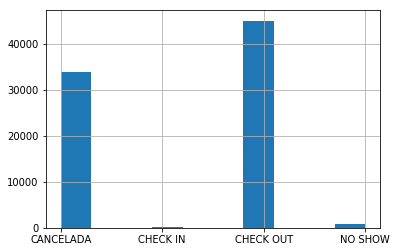

In [135]:
df_1.ESTADO.hist()

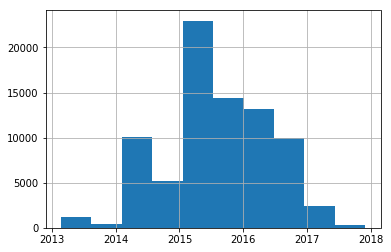

In [138]:
df_1.CREACION.hist()

In [246]:
df_1["SALIDA_CORREGIDA"]=df_1.ENTRADA+pd.to_timedelta(df_1.NOCHES, unit='D')

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
df_1[(df_1.ENTRADA<="2017-08-04") & (df_1.SALIDA_CORREGIDA>="2017-08-04")].shape

(82, 13)

In [258]:
fecha="2017-11-17" 
df_1[(df_1.ENTRADA<=fecha) & (df_1.SALIDA_CORREGIDA>=fecha) & (np.logical_or(df_1.ESTADO=="CHECK IN",df_1.ESTADO=="CHECK OUT"))].head()

,HOTEL,ANO,SEGMENTO,ORIGEN,ESTADO,ENTRADA,SALIDA,CREACION,ANULACION,NOCHES,ADULTOS,OVERBOOKING,SALIDA_CORREGIDA


In [178]:
min(df_1.ENTRADA)

Timestamp('2015-01-03 00:00:00')

In [180]:
max(df_1.SALIDA)

Timestamp('2017-12-03 00:00:00')

In [181]:
df_1.sort_values(by="ENTRADA")

,HOTEL,ANO,SEGMENTO,ORIGEN,ESTADO,ENTRADA,SALIDA,CREACION,ANULACION,NOCHES,ADULTOS,OVERBOOKING
1901,Casa Andina Private Collection Miraflores,2015,USO CASA,INDUCCION,CANCELADA,2015-01-03,2015-01-04,2014-01-28,2014-04-04,31,2.0,
8009,Casa Andina Private Collection Miraflores,2015,TURISMO GRUPOS,SERIE,CANCELADA,2015-01-03,2015-03-03,2014-02-05,2014-08-05,2,1.0,
8008,Casa Andina Private Collection Miraflores,2015,TURISMO GRUPOS,SERIE,CANCELADA,2015-01-03,2015-03-03,2014-02-05,2014-08-05,2,1.0,
1876,Casa Andina Private Collection Miraflores,2015,USO CASA,INDUCCION,CANCELADA,2015-01-03,2015-01-04,2014-01-28,2014-04-04,31,1.0,
2283,Casa Andina Private Collection Miraflores,2015,TURISMO GRUPOS,SERIE,CHECK OUT,2015-01-03,2015-03-03,2014-02-25,NaT,2,2.0,
1877,Casa Andina Private Collection Miraflores,2015,USO CASA,INDUCCION,CANCELADA,2015-01-03,2015-01-04,2014-01-28,2014-04-04,31,1.0,
2284,Casa Andina Private Collection Miraflores,2015,TURISMO GRUPOS,SERIE,CHECK OUT,2015-01-03,2015-03-03,2014-02-25,NaT,2,2.0,
2285,Casa Andina Private Collection Miraflores,2015,TURISMO GRUPOS,SERIE,CHECK OUT,2015-01-03,2015-03-03,2014-02-25,NaT,2,2.0,
1880,Casa Andina Private Collection Miraflores,2015,USO CASA,INDUCCION,CANCELADA,2015-01-03,2015-01-04,2014-01-28,2014-04-04,31,1.0,
17059,Casa Andina Private Collection Miraflores,2015,TRIPULACION,TRIPULACION,CHECK OUT,2015-01-03,2015-02-03,2015-02-18,NaT,1,1.0,


In [183]:
rango=pd.date_range(start=min(df_1.ENTRADA), end=max(df_1.SALIDA), freq='D')

In [251]:
valores=list()
for fecha in rango:
    valor=df_1[(df_1.ENTRADA<=fecha) & (df_1.SALIDA_CORREGIDA>=fecha) & (np.logical_or(df_1.ESTADO=="CHECK IN",df_1.ESTADO=="CHECK OUT"))].shape[0]
    valores.append(valor) 

In [252]:
serie=pd.DataFrame({"fecha":rango, "ocupacion":valores})

In [256]:
serie[serie.ocupacion<5]

,fecha,ocupacion
15,2015-01-18,3
16,2015-01-19,3
17,2015-01-20,3
18,2015-01-21,3
19,2015-01-22,2
20,2015-01-23,2
21,2015-01-24,2
22,2015-01-25,1
23,2015-01-26,1
24,2015-01-27,1
